# Homework 2: Training neural network: Data augmentation

Tiếp nối bài thực hành trên lớp, bài tập về nhà này vẫn sử dụng MNIST là tập dữ liệu thử nghiệm. Mục tiêu là cải thiện hiệu suất của mô hình bằng các kỹ thuật Augmentation nhằm tăng cường số lượng dữ liệu

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

%load_ext tensorboard
!rm -rf './graph/dropout/dropout=0.5,relu/'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training image: ', x_train.shape)
print('Testing image: ', x_test.shape)
print('Training label: ', y_train.shape)
print('Testing label: ', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training image:  (60000, 28, 28)
Testing image:  (10000, 28, 28)
Training label:  (60000,)
Testing label:  (10000,)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [ ]:
def simple_model(dropout_rate=0.5, activation_function='relu'):
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))
    
    return model 

## Tăng thêm dữ liệu (data augmentation) với thư viện imgaug

Trong phần thực hành này, chúng ta sẽ làm quen với các phương pháp tăng dữ liệu cho bài toán xử lý ảnh, các phương pháp này hoàn toàn có thể lập trình sử dụng thư viện numpy (vì bản chất của phương pháp là ta thao tác trên ma trận biểu diễn ảnh). Tuy nhiên, để việc lập trình được nhanh chóng, chúng ta sẽ làm quen với một thư viện rất mạnh mẽ, giúp ta nhanh chóng cài đặt nhiều phương pháp tăng dữ liệu hiệu quả khác nhau: thư viện imgaug

Để cài đặt imgaug, ta sử dụng lệnh:

pip install imgaug

pip install scikit-image --upgrade

In [ ]:

from imgaug import augmenters as iaa

Để tìm hiểu lần lượt các phương pháp, thử áp dụng trên ảnh cat.jpg trong thư mục bài thực hành:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/DL/Lesson2/DL-Thực hành ở nhà-02')

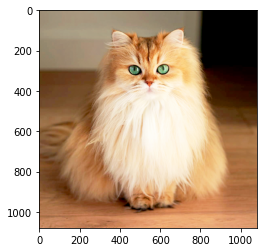

In [ ]:
image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


### Các phương pháp thường sử dụng

Các phương pháp hay được sử dụng nhất trong các bài toán xử lý ảnh có thể tham khảo tại: https://imgaug.readthedocs.io/en/latest/source/augmenters.html

- CropAndPad: Cắt hoặc thêm các pixel vào ảnh.

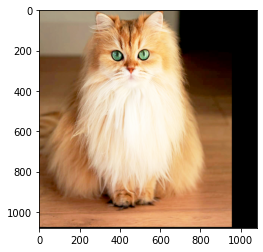

In [ ]:
crop_and_pad = iaa.CropAndPad(percent=(-0.25, 0.25))
plt.imshow(cv2.cvtColor(crop_and_pad.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Flip: Flip left-right hoặc Flip up-down một số ảnh trong tập ảnh truyền vào 

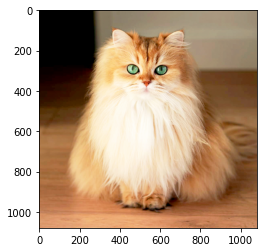

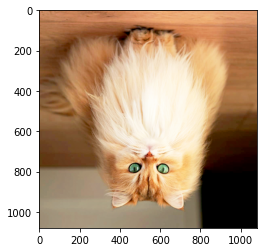

In [ ]:
flip_lr = iaa.Fliplr(1.0)
flip_ud = iaa.Flipud(1.0)

plt.imshow(cv2.cvtColor(flip_lr.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(flip_ud.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Affine: Các phép biến đổi affine như scale, rotate, translate:

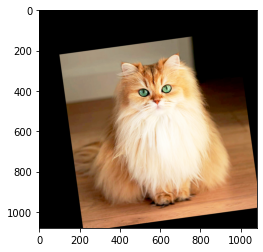

In [ ]:
affine = iaa.Affine(scale=(0.5, 1.5), rotate=(-15,15), translate_percent=(-0.2, 0.2))
plt.imshow(cv2.cvtColor(affine.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Blur: Sử dụng các bộ lọc Gaussian hoặc Median:

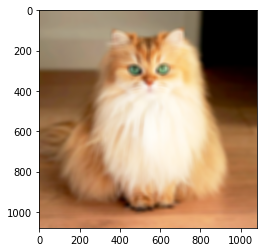

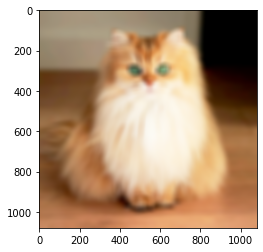

In [ ]:
avg_blur = iaa.AverageBlur(k=(11, 31))
gauss_blur = iaa.GaussianBlur(sigma=(5.0, 15.0))

plt.imshow(cv2.cvtColor(avg_blur.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(gauss_blur.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Dropout: Biến đổi ngẫu nhiên một phần ảnh thành các pixel đen 

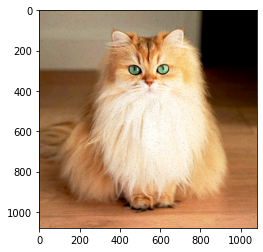

In [ ]:
dropout = iaa.Dropout(p=(0, 0.2))

plt.imshow(cv2.cvtColor(dropout.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

### Kết hợp nhiều augmenter

Trong thực tế, có nhiều chiến lược trong việc thực hiện các augmenter khác nhau, thư viện imgaug cũng hỗ trợ một số hàm để thực hiện công việc này:

- Sequential: Áp dụng các augmenter lần lượt theo thứ tự truyền vào:

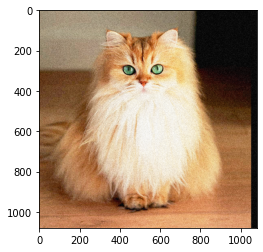

In [ ]:
aug = iaa.Sequential([
    iaa.Affine(translate_px={"x":(-40, 40)}),
    iaa.AdditiveGaussianNoise(scale=0.1*255)
])

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- SomeOf: Áp dụng ngẫu nhiên một vài augmenter trong list các augmenter:

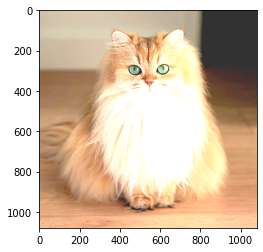

In [ ]:
aug = iaa.SomeOf(2, [
    iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.2*255),
    iaa.Add(50, per_channel=True),
    iaa.Sharpen(alpha=0.5)
])

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Sometimes: Áp dụng augmenter với xác suất p:

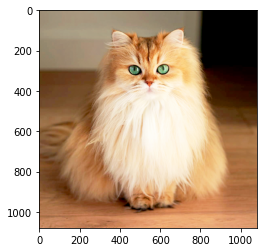

In [ ]:
aug = iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=20.0))

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

### Kết hợp cùng thư viện Keras

Bây giờ chúng ta sẽ sử dụng các augmenter đã viết để thực hiện augment image trong quá trình huấn luyện mạng với thư viện Keras. 

- Bước 1: Khởi tạo Augmenter:

In [ ]:
our_aug = iaa.Dropout(p=(0, 0.002))

- Bước 2: Xây dựng generator:

In [ ]:
def generator(images, labels, batch_size):
    # Pointer
    idx = 0
    
    num_images = images.shape[0]
    
    while True:
        # Get next batch
        idx_end = min(num_images, idx + batch_size)
        batch_image = images[idx:idx_end]
        batch_label = labels[idx:idx_end]
        
        # Augment images
        # Note: imgaug only works with image which has pixel in range [0, 255]
        batch_image = our_aug.augment_image(batch_image * 255) / 255.0
        
        # Update pointer
        idx = idx_end
        
        # If end of a epoch:
        if idx == num_images:
            # Shuffle dataset
            perm = np.random.permutation(num_images)
            images = images[perm]
            labels = labels[perm]
            
            # Reset pointer
            idx = 0
            
        # Yield batch
        yield batch_image, batch_label

Quan sát thử kết quả của generator bên trên:

(32, 28, 28)


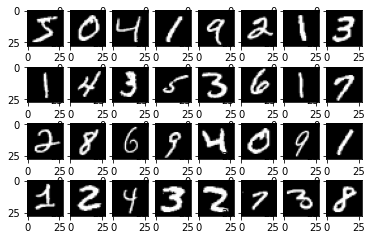

In [ ]:
for (image, label) in generator(x_train, y_train, 32):
    print(image.shape)
    for i in range(32):
        plt.subplot(4, 8, i + 1), plt.imshow(image[i], cmap='gray')
    plt.show()
    break

- Bước 3: Train model với fit_generator:

In [ ]:
model = simple_model()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Calculate number of step per epoch
batch_size = 128
step_per_epoch = int(np.ceil(x_train.shape[0] * 1.0 / batch_size))

# Fit generator
model.fit_generator(generator(x_train, y_train, batch_size),
          steps_per_epoch=step_per_epoch,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 2.4462 - accuracy: 0.1014 - val_loss: 2.3287 - val_accuracy: 0.1174
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3756 - accuracy: 0.1209 - val_loss: 2.2641 - val_accuracy: 0.1642
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3087 - accuracy: 0.1462 - val_loss: 2.2031 - val_accuracy: 0.2233
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2500 - accuracy: 0.1725 - val_loss: 2.1455 - val_accuracy: 0.2900
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1968 - accuracy: 0.2006 - val_loss: 2.0911 - val_accuracy: 0.3550
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1425 - accuracy: 0.2303 - val_loss: 2.0388 - val_accuracy: 0.4166
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss